# Exploratory  Data Analysis

EDA stands for Exploratory Data Analysis. It's an approach to analyzing data sets and to summarize their main characteristics, often with data visualization methods. EDA is typically the first step in data analysis, taken before any formal modeling is applied. Its primary goal is to gain insight into the data and determine how best to manipulate data sources to get the answers you need, making it easier to detect patterns, spot anomalies, test assumptions, and formulate hypotheses for further investigation.

## Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style="whitegrid", font_scale=1.75)
plt.style.use('ggplot')
# prettify plots\n
plt.rcParams['figure.figsize'] = [15.0, 5.0]

## Load Dataset

In [2]:
train_df = pd.read_csv("titanic_train.csv")
test_df = pd.read_csv("titanic_test.csv")

## EDA

When doing exploratory data analysis on a binary classification problem, we should usually go for the following approach:

- Understand the given problem statement
  
- Perform statistical analysis on the given data, this may include mean, median, mode, percentiles, min, max, etc.
  
- Understand the relation between features and how the affect the label, this can be done by studing the correlation of features
  
- Transform categorical variables into numeric
  
- Check if the dataset is skewed or not
  
- Check the frequency of each category in categorical features, use count plots to understand their relation with the target variable
  
- Understand the distribtion of continuous features, plotting the histograms and boxplots will help
  
- Use a heatmap to understand the correlation between continuous features
  
- Check for missing values, apply appropriate transformation by either imputing the data or deleting the records
  
- Mark the important features in the data

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


First, let's explain each feature in the dataset

| Variable | Description                           |
|----------|---------------------------------------|
| Survived | Survived (1) or died (0)            |
| Pclass   | Passenger's class                    |
| Name     | Passenger's name                     |
| Sex      | Passenger's sex                      |
| Age      | Passenger's age                      |
| SibSp    | Number of siblings/spouses aboard    |
| Parch    | Number of parents/children aboard    |
| Ticket   | Ticket number                        |
| Fare     | Fare                                  |
| Cabin    | Cabin                                 |
| Embarked | Port of embarkation                  |

- Survived is the target label, it is already encoded
  
- Pclass is a categorical feature, it is already encoded with 1=1st, 2=2nd, 3=3rd
  
- Name maybe correlated with some feature that affects the label, for example, some surnames are 
  related to wealthier families, or a name prefix may indicate higher status. However, finding these patterns will take a long time and the results may not be affected significantly so we will not be using this feature

- Sex is a categorical feature, either 'male' or 'female', we will have to encode this feature later to be able to feed it into the model
  
- Age is continuous data, it is fare to assume that this feature will have high impact on the label
  
- Parch and SibSp, we need to check if there is correlation between these columns and the label
  
- Cabin, there are usually a limited number of cabins, so we should expect some missing values in 
this column

- Embarked, this is a categorical column that we should encode, (C = Cherbourg, Q = Queenstown, S = Southampton). We need to check if it has any correlation with the label or other features

Now, that we can start with the analysis. Pandas will be your go tool through the whole process. We can get a discription of statistics for sensible columns using describe() function

In [4]:
sensible_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin']
train_df[sensible_columns].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can start by checking if the dataset is skewed (imbalanced). We will do that using a count plot from seaborn package.

## Survived

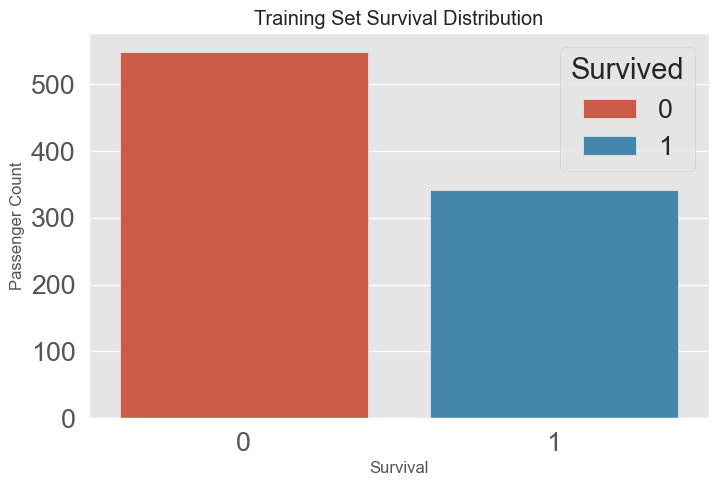

Survived
0    549
1    342
Name: count, dtype: int64


In [5]:
plt.figure(figsize=(8,5))
plt.xlabel('Survival')
plt.ylabel('Passenger Count')
plt.title('Training Set Survival Distribution')
sns.countplot(x=train_df['Survived'], hue=train_df['Survived'])
plt.show()
print(train_df['Survived'].value_counts())

Due to the class imbalance we will employ F1-score to evaluate machine learning classifiers Later.

### Duplicates

The dataset may have duplicate rows, this should be handled as it will skew the probabilities and distributions. It may affect our analysis and the quality of our classifier. We are going to remove the **PassengerId** column because it is a unique identifier for indexing, it does not affect the classification in any way.

In [6]:
train_df.drop(columns=["PassengerId"], inplace=True)

In [7]:
train_df.duplicated().any()

False

<i><p style="font-size:16px; border: 2px solid black; margin: 20px; padding: 20px;">So there aren't any duplicates in the dataset, Problem solved :D

### Data Types

Before we contuinue, we need to make sure that each feature has a proper type. 

In [8]:
train_df.drop(columns=['Name'], inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


The data types do make sense; however, if we we look at the Non-Null count, we cab see that there some missing values (not all the columns have the same count), so let's check that now.

Text(0.5, 1.0, 'Null Values in Training Set')

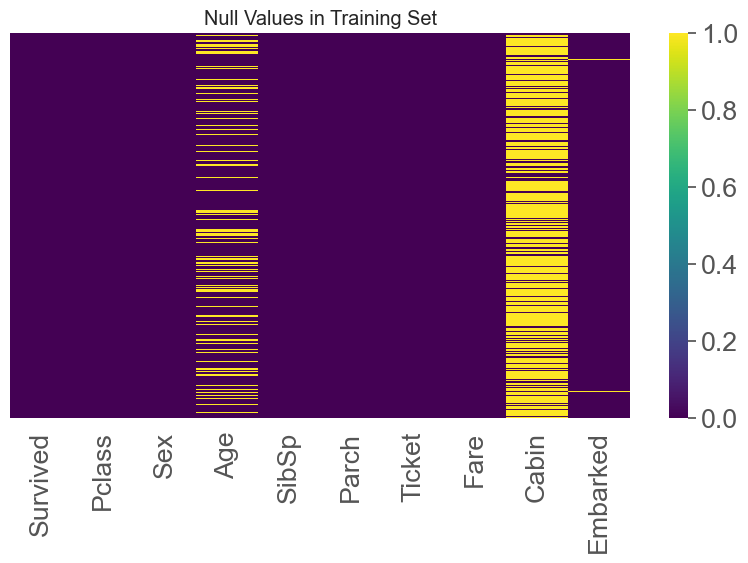

In [9]:
train_df.isna().sum()

plt.figure(figsize=(10,5))
sns.heatmap(train_df.isnull(), yticklabels=False, cmap='viridis')
plt.title('Null Values in Training Set')

<i><p style="font-size:16px; border: 2px solid black; margin: 20px; padding: 20px;">We know that there are only a finite number of Cabins on board and so the rest of the passengers are not travelling in a Cabin, and if there are missing values among those, then it's neglible as there are only a handful of cabins across the ship.Two passenger's Embarked status is not known. Two passenger's Embarked status are not known. So the only field that is unknown and could be something to think about (or investigate or impute) would be Age. For example, there is a tendency to impute missing numeric fields with average values or medians, and these could be tricky at time. In addition, changing any data would impact the reality of the dataset and also add/remove exisitng bias.</i>

For now, we need to check the relation of the features with the label

### Sex

<Axes: xlabel='Sex', ylabel='count'>

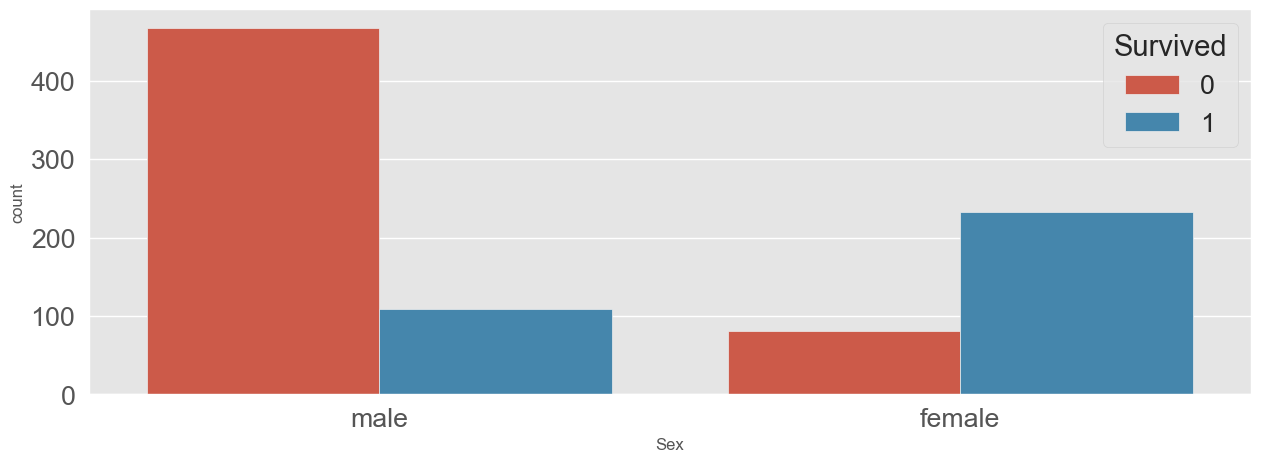

In [10]:
sns.countplot(x=train_df['Sex'].sort_values(ascending=False), hue=train_df['Survived'])

<i><p style="font-size:16px; border: 2px solid black; margin: 20px; padding: 20px;">It is clear that most men died, while most females survived. So we should expect higher probability of surviving if the passenger is a female. This is most probably due to women and children being given priority on life boats.

### Passenger Class (PClass)

<Axes: xlabel='Pclass', ylabel='count'>

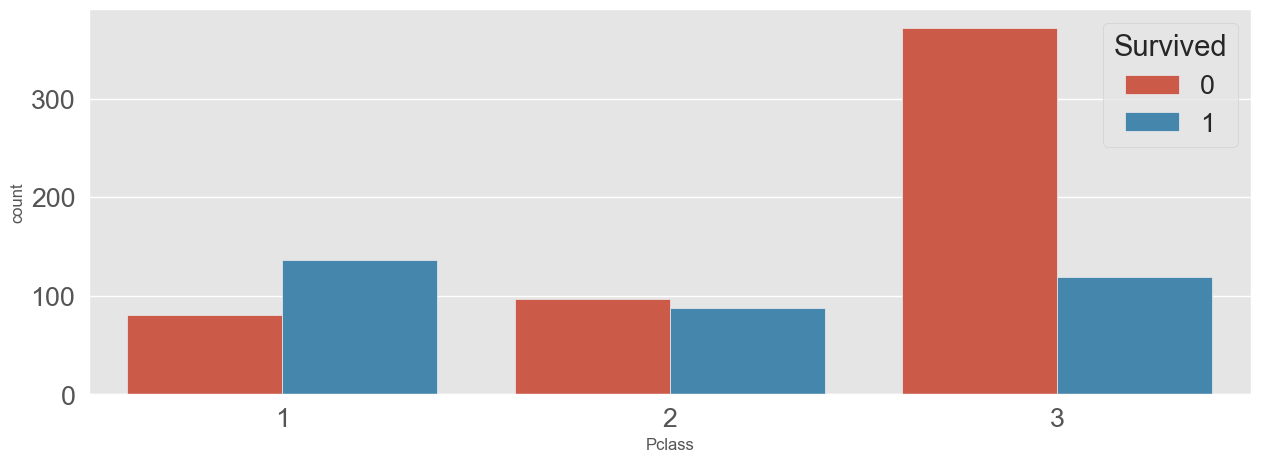

In [11]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)

<i><p style="font-size:16px; border: 2px solid black; margin: 20px; padding: 20px;">We could conclude **first class** passengers were given preference, over the other classes - given the time in the history of the event.

### Combining Gender and Passenger Class (PClass)

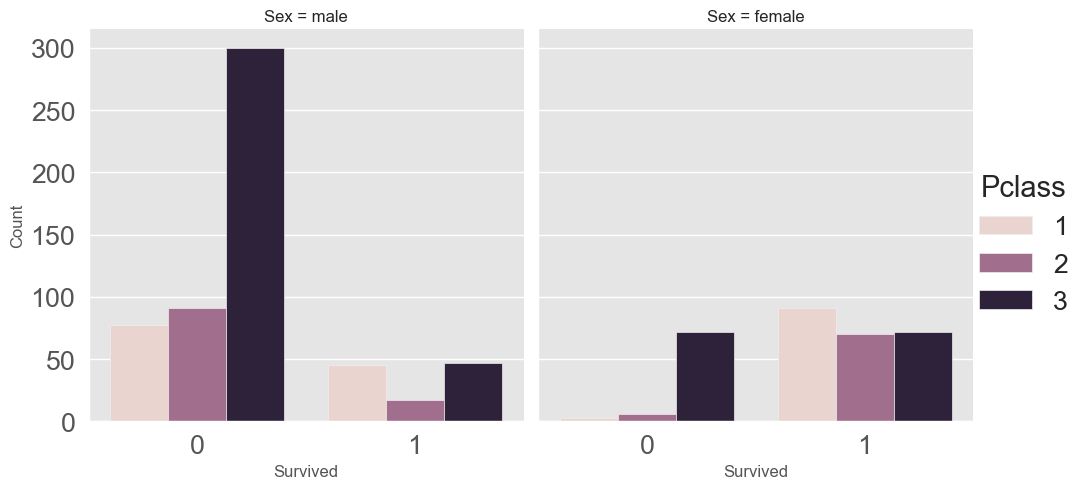

In [12]:
g = sns.catplot(x='Survived', hue='Pclass', col='Sex', data=train_df, kind='count')

# Set titles and labels
g.set_axis_labels("Survived", "Count")
g.set_titles("Sex = {col_name}")

<i><p style="font-size:16px; border: 2px solid black; margin: 20px; padding: 20px;">Combining the two we could conclude further that first class passengers of both genders were given higher preference over the other classes, and men were lost saving others in the process (mainly women and children) - given the time in the history of the event.

### Fare

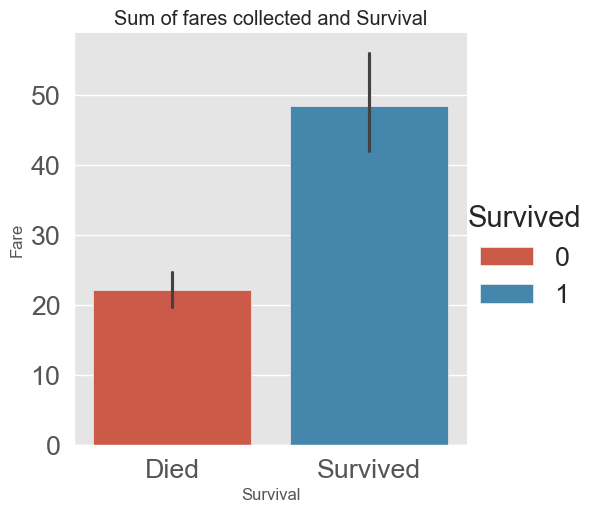

In [13]:
g = sns.catplot(x="Survived", y="Fare", hue="Survived", data=train_df, kind="bar")
g.ax.set_xticks([0, 1])
g.ax.set_xticklabels(['Died', 'Survived'])
g.set(xlabel="Survival", title="Sum of fares collected and Survival")

<Axes: xlabel='Survived', ylabel='Fare'>

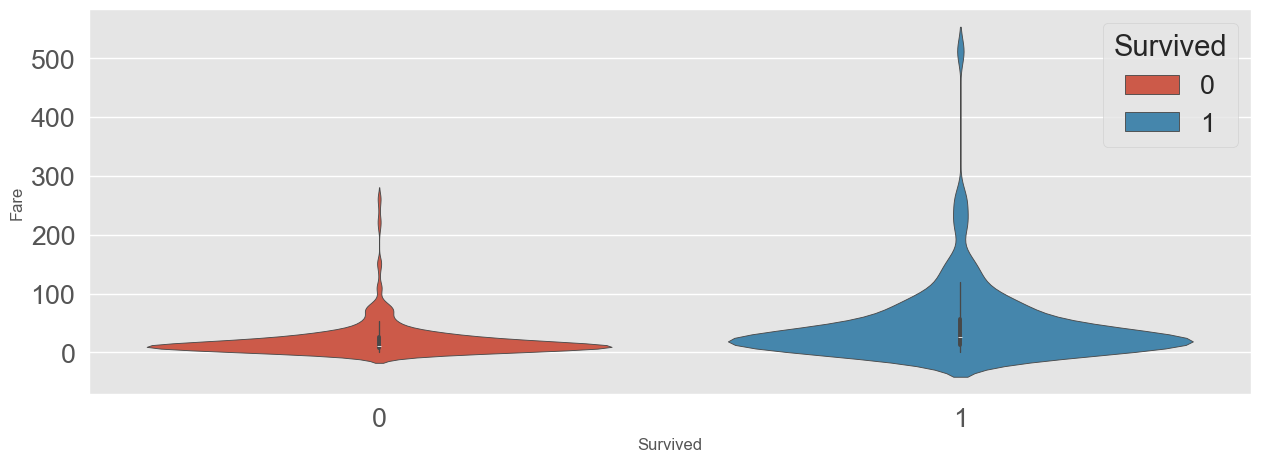

In [14]:
sns.violinplot(data=train_df, x='Survived', y='Fare', hue='Survived')

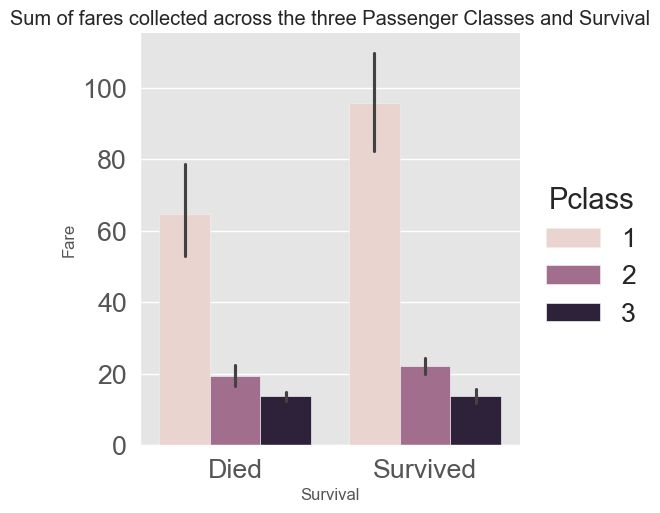

In [15]:
g = sns.catplot(x="Survived", y="Fare", hue="Pclass", data=train_df.sort_values(by='Pclass'), kind="bar")
g.ax.set_xticks([0, 1])
g.ax.set_xticklabels(['Died', 'Survived'])
g.set(xlabel="Survival", title="Sum of fares collected across the three Passenger Classes and Survival")

<i><p style="font-size:16px; border: 2px solid black; margin: 20px; padding: 20px;">Fare does not conclusively say if ones who paid more were more likely to survive, although there are outliers that need to also be considered. Maybe looking at a slightly higher-level class could help.

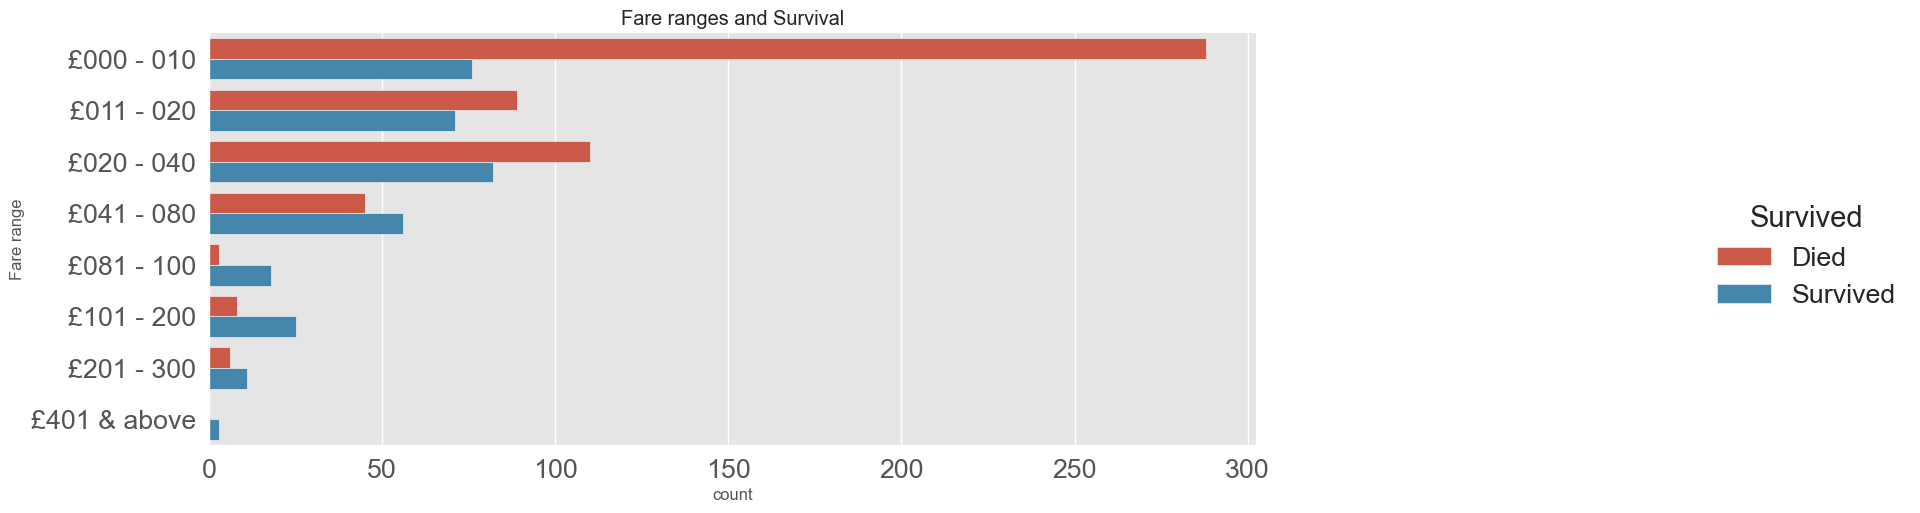

In [16]:
def apply_fare_ranges(fare):
    result = []
    mapping = {
           11: "£000 - 010",
           21: "£011 - 020",     
           41: "£020 - 040",
           81: "£041 - 080",
          101: "£081 - 100",
          201: "£101 - 200",
          301: "£201 - 300",
          401: "£301 - 400",
          515: "£401 & above"  # in this case the max fare is around £512
    }    
    for each_fare in fare.values:
        if type(each_fare) == str:
            result.append(category)
        else:
            category = "Unknown"
            if each_fare != np.nan:
                for each_fare_range in mapping:
                    if  each_fare < each_fare_range:
                        category = mapping[each_fare_range]
                        break
            result.append(category)

    return result

train_df['Fare_range'] = apply_fare_ranges(train_df['Fare'])
g = sns.catplot(y="Fare_range", hue="Survived", data=train_df.sort_values(by='Fare'), kind="count")
g.set(ylabel="Fare range", title="Fare ranges and Survival")
new_labels = ['Died', 'Survived']
for t, l in zip(g._legend.texts, new_labels): 
    t.set_text(l)

g.fig.set_figwidth(30)

In [17]:
def passenger_class_filtered_dataset(passenger_class):
    dataset = train_df.copy()
    class_filter = dataset['Pclass'] == passenger_class
    return dataset[class_filter]

def draw_passenger_class_chart(passenger_class, title):
    dataset = passenger_class_filtered_dataset(passenger_class)
    g = sns.catplot(y="Fare_range", hue="Survived", data=dataset.sort_values(by='Pclass'), kind="count")
    g.set(ylabel="Fare range", title=title)
    new_labels = ['Died', 'Survived']
    for t, l in zip(g._legend.texts, new_labels): 
        t.set_text(l)

    g.fig.set_figwidth(30)

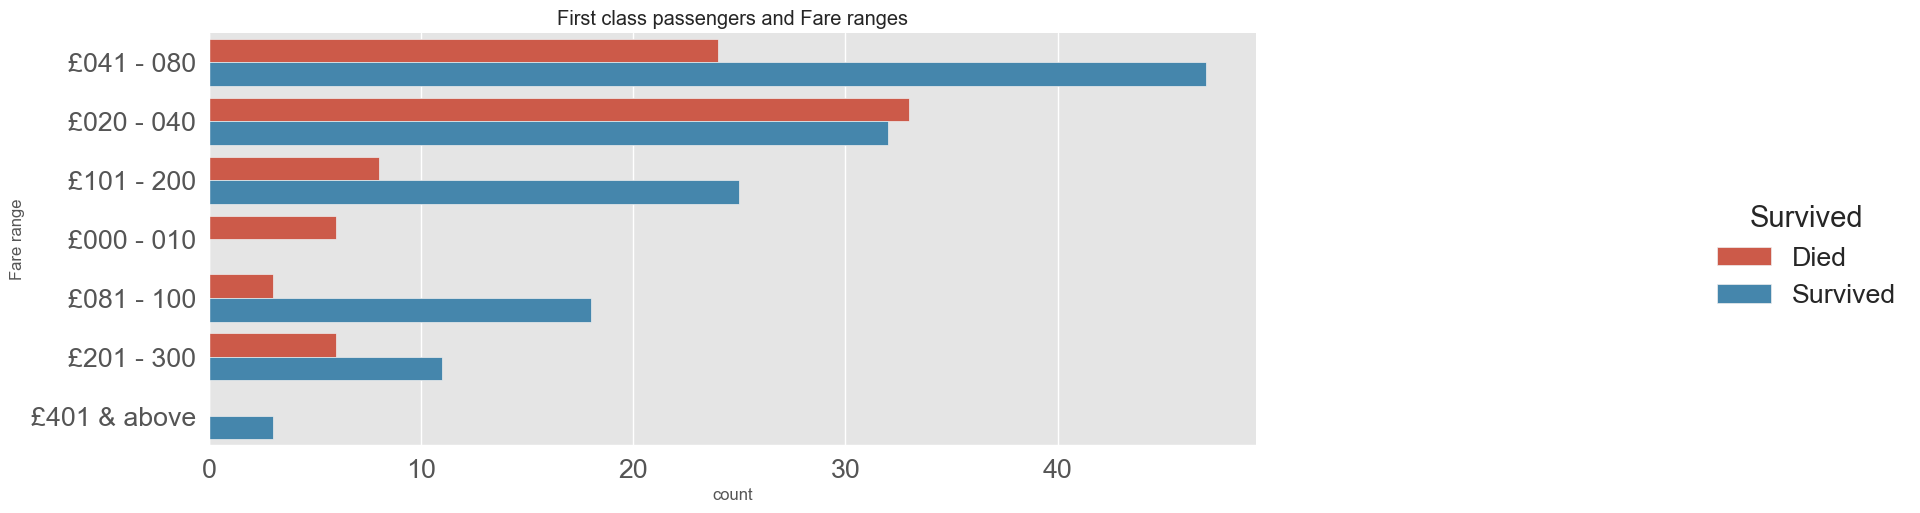

In [18]:
draw_passenger_class_chart(1, "First class passengers and Fare ranges")

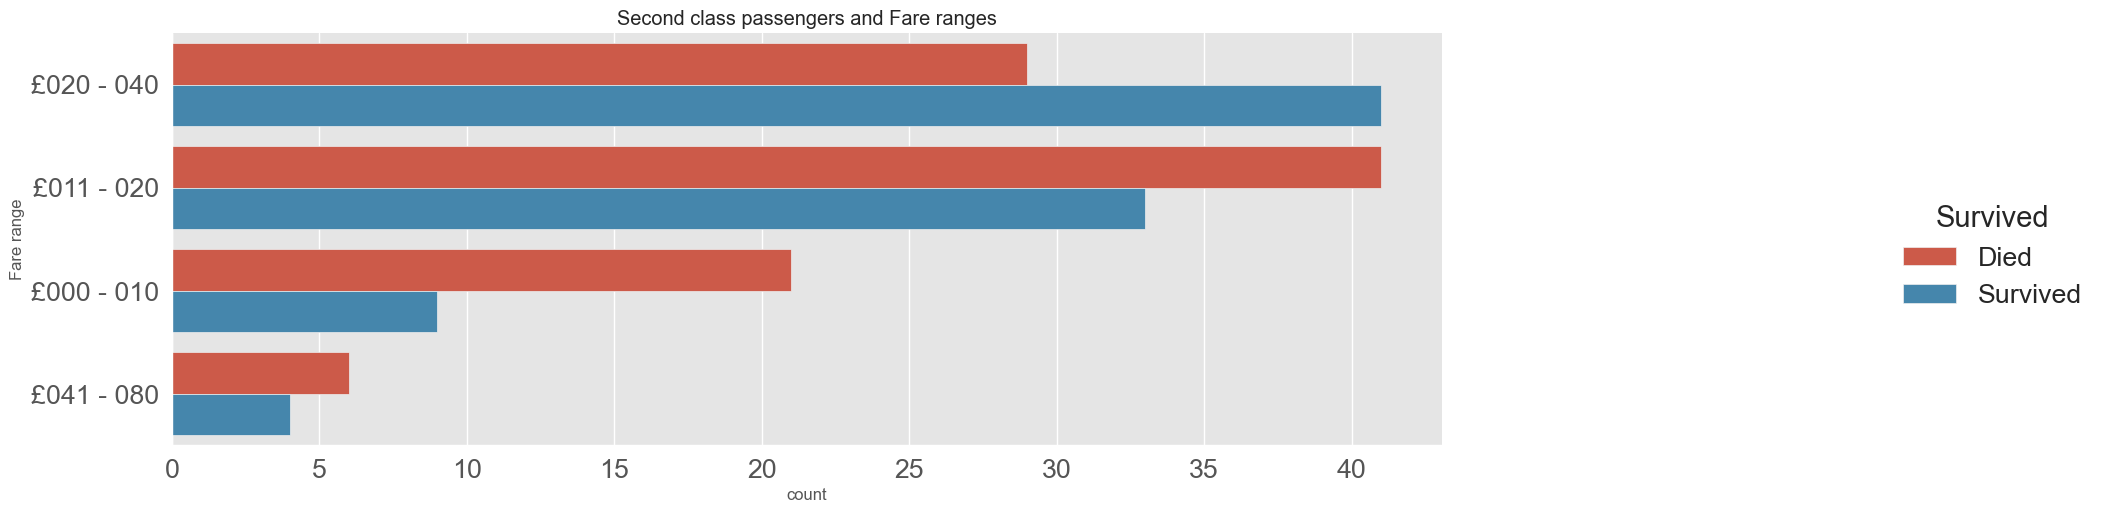

In [19]:
draw_passenger_class_chart(2, "Second class passengers and Fare ranges")

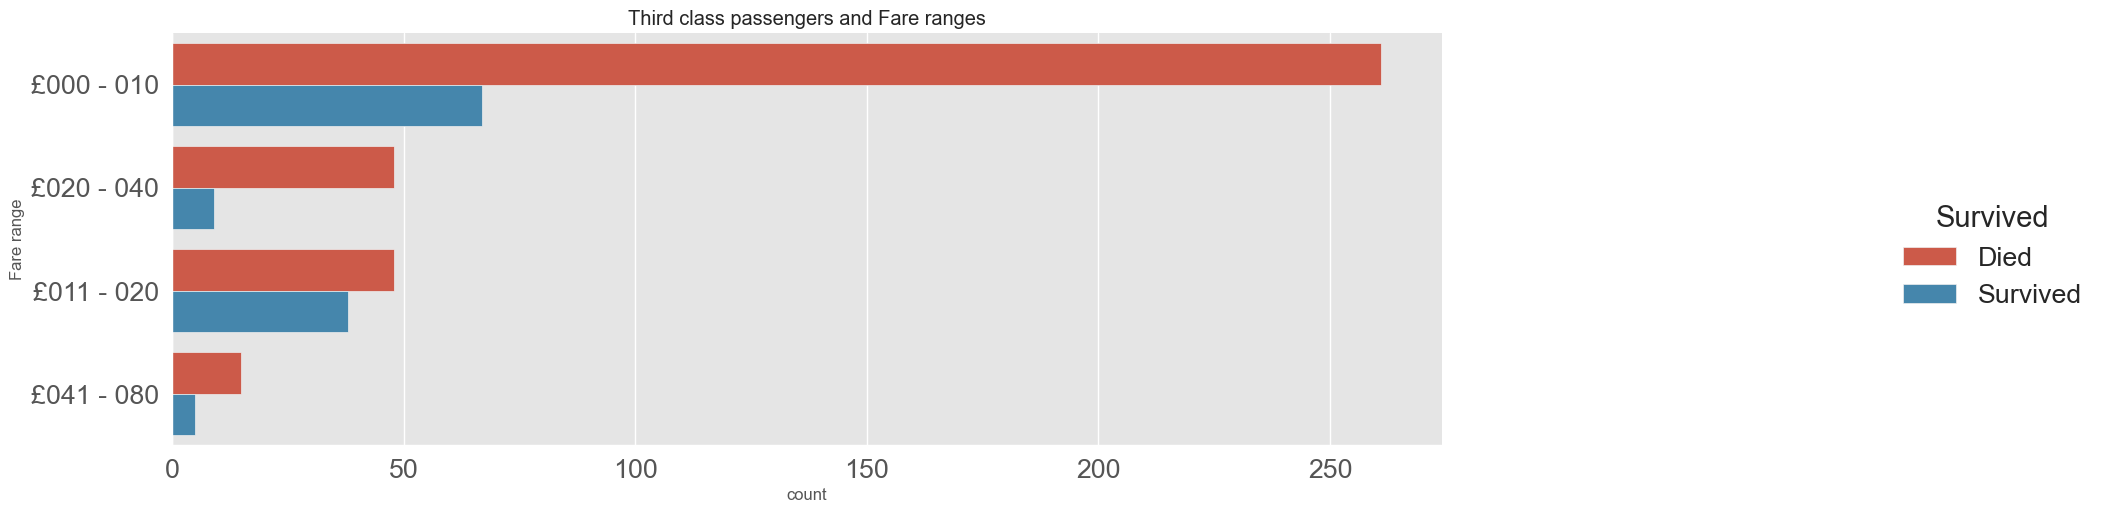

In [20]:
draw_passenger_class_chart(3, "Third class passengers and Fare ranges")

<i><p style="font-size:16px; border: 2px solid black; margin: 20px; padding: 20px;">Again, if we take a closer look, we can see a spread in the number of survivors across the different Passenger classes and within them the different Fare ranges. We see that low to high Fare ranges exists across all three Passenger classes. Hence it is not easy to conclude if survival depended on who paid more to get a ticket (from the Fare range information) but along with the Passenger class information we can say those in lower-classes suffered more than those in the higher classes, and sometimes irrespective of how much they paid to get their tickets.

### Embark Port

<Axes: xlabel='Embarked', ylabel='count'>

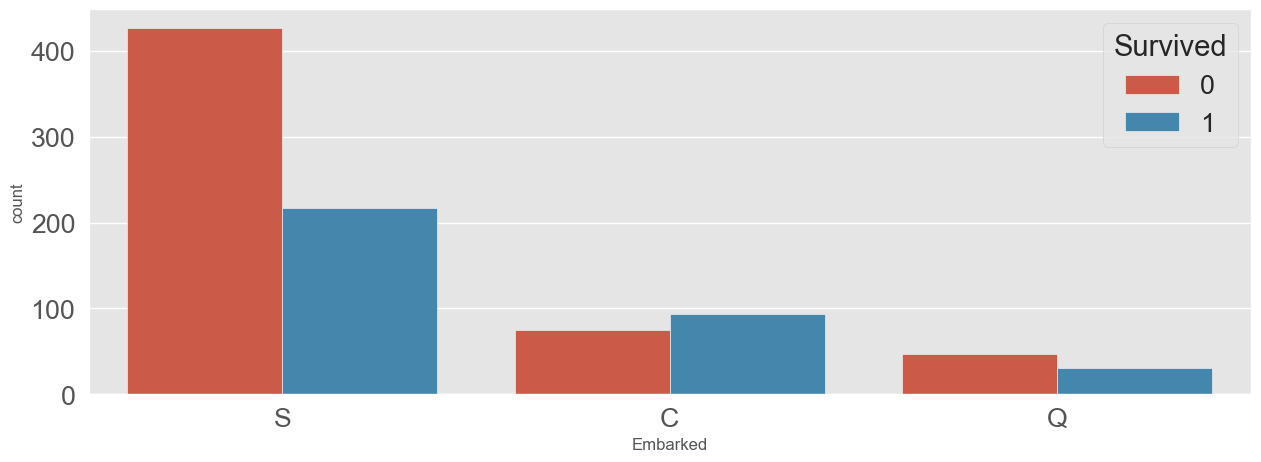

In [21]:
sns.countplot(x=train_df['Embarked'].sort_values(ascending=False), hue=train_df['Survived'])

<i><p style="font-size:16px; border: 2px solid black; margin: 20px; padding: 20px;">We can deduce that it is more likely a passenger is did not survive if he/she embarked from Southampton. Does it have to do with the class they travelled in or if they were in a cabin or not?

### Age

<Figure size 1000x600 with 0 Axes>

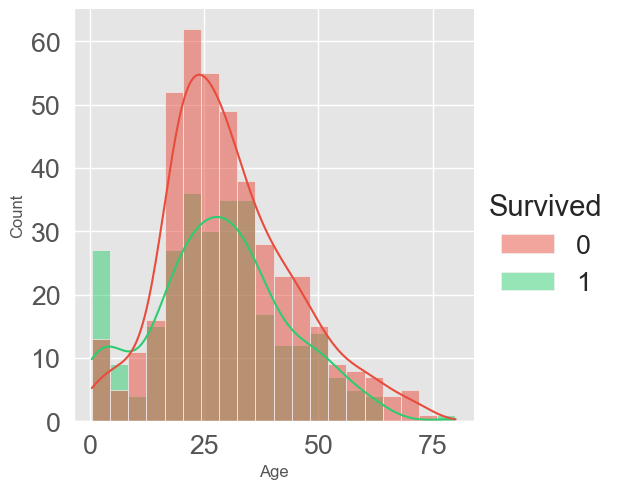

In [22]:
plt.figure(figsize=(10, 6))
plt.tight_layout(h_pad=6)

sns.displot(train_df, x='Age', hue='Survived', kde=True, palette={0: '#e74c3c', 1: '#2ecc71'})

<i><p style="font-size:16px; border: 2px solid black; margin: 20px; padding: 20px;">From this graph alone it is hard to conclude any results about age</i>

Let's group them by gender

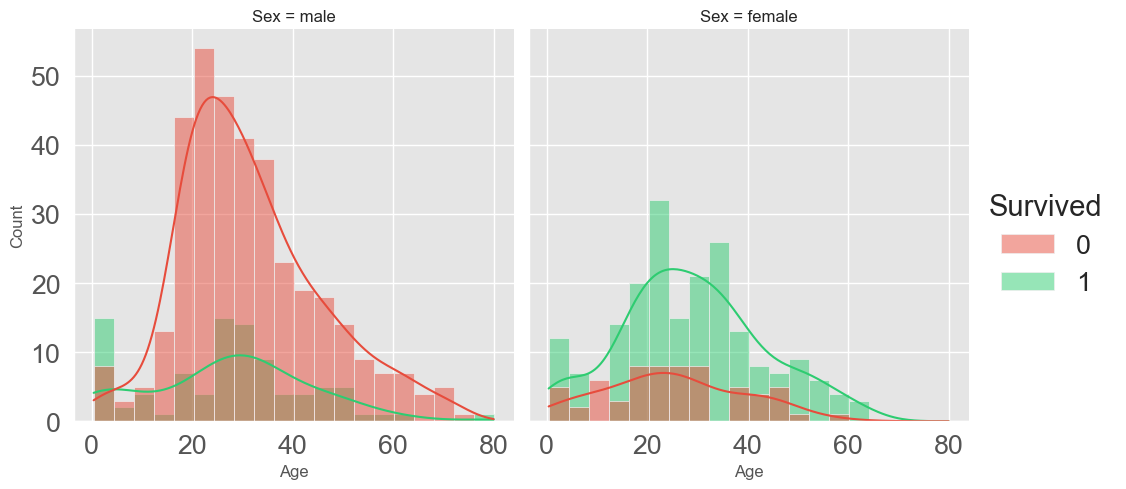

In [23]:
sns.displot(train_df, x='Age', hue='Survived', col='Sex', kde=True, palette={0: '#e74c3c', 1: '#2ecc71'})


<i><p style="font-size:16px; border: 2px solid black; margin: 20px; padding: 20px;">Now we can tell that age does not tell much, if the passanger was man with age less than 7-8 then he would have more probability to have survived. On the other hand, females of all ages had better chances of survival.</i>

However we should not forget that there are missing values in the dataset

c:\Users\hai_c\MiniConda3\envs\bootcamp\Lib\site-packages\seaborn\axisgrid.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(**kwargs)


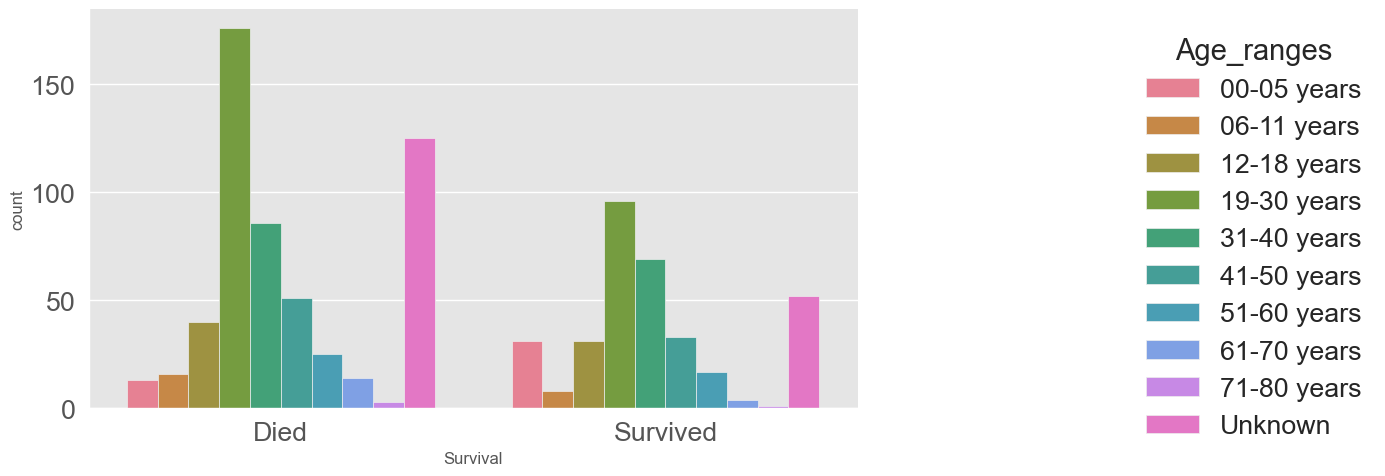

In [24]:
def apply_age_ranges(age):
    result = []
    mapping = {
            6: "00-05 years",
           12: "06-11 years",     
           19: "12-18 years",
           31: "19-30 years",
           41: "31-40 years",
           51: "41-50 years",
           61: "51-60 years",
           71: "61-70 years",
           81: "71-80 years",
           91: "81-90 years",
           124: "91+ years",  # (123 is the oldest age known till date)
    }
            
    for each_age in age.values:
        if type(each_age) == str:
            result.append(category)
        else:
            category = "Unknown"
            if each_age != np.nan:
                for each_age_range in mapping:
                    if  each_age < each_age_range:
                        category = mapping[each_age_range]
                        break
            result.append(category)
    return result

train_df['Age_ranges'] = apply_age_ranges(train_df['Age'])
g = sns.catplot(x="Survived", hue="Age_ranges", data=train_df.sort_values(by='Age'), kind='count')
g.set(xlabel="Survival", xticklabels=['Died', 'Survived'])
g.set(xlabel="Survival")
g.fig.set_figwidth(16)

### Cabin

In [25]:
train_df['has_cabin'] = train_df['Cabin'].apply(lambda x: 0 if x is np.nan else 1)


<Axes: xlabel='has_cabin', ylabel='Survived'>

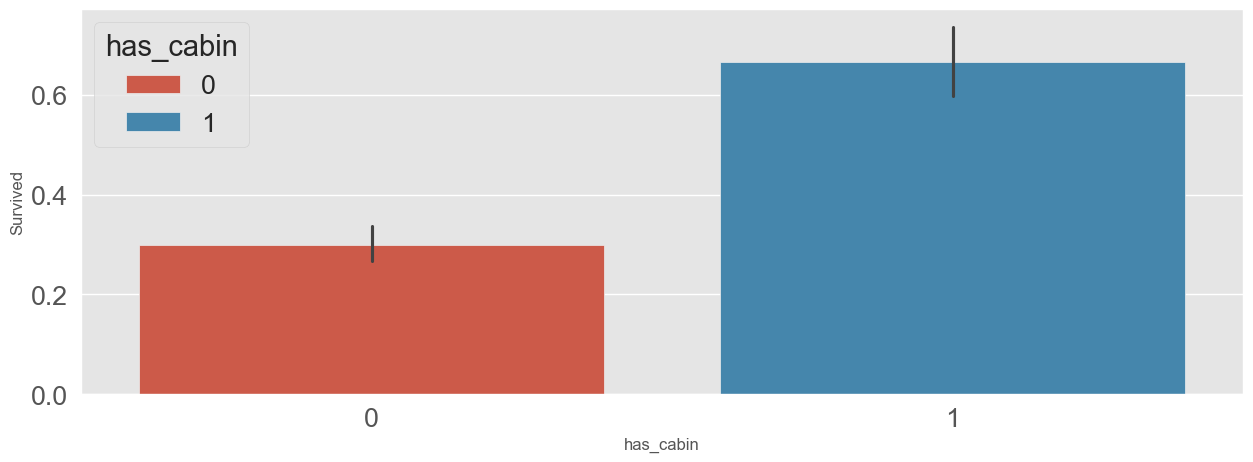

In [26]:
sns.barplot(data=train_df, x='has_cabin', y='Survived', hue='has_cabin')

<Axes: xlabel='has_cabin', ylabel='count'>

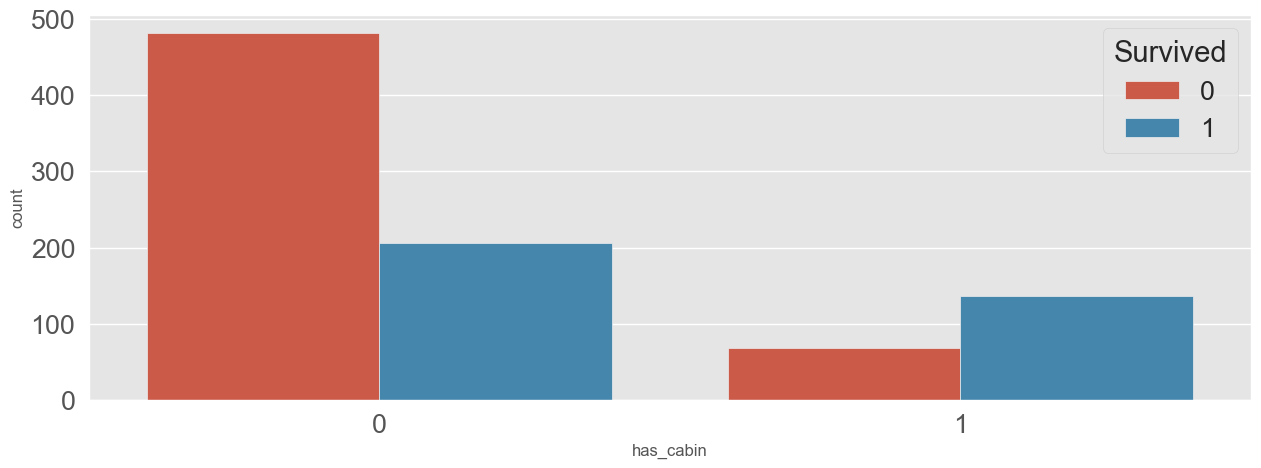

In [27]:
sns.countplot(data=train_df, x='has_cabin', hue='Survived')


<i><p style="font-size:16px; border: 2px solid black; margin: 20px; padding: 20px;">It seems that passengers that had cabins survived more than the other without cabins, this could be another indicator that high class passangers were given priority when fleeing the deck.

### Tickets

In [28]:
train_df['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

<i><p style="font-size:16px; border: 2px solid black; margin: 20px; padding: 20px;">Above show that in many cases a single ticket can be held by multiple people, or be shared across a family or group of passengers. While many of the tickets are held under a single owner/passenger.</i>

Let's create a new feature called "is_Group" from the ticket is held by multiple people we will assume they are in a group

In [29]:
ticket_groups = train_df["Ticket"].value_counts()
groups_list = list(ticket_groups[ticket_groups != 1].index)
is_group = train_df.Ticket.isin(groups_list)*1
train_df["in_Group"] = is_group

Now, we can check the survival vs in_Group

<Axes: xlabel='in_Group', ylabel='count'>

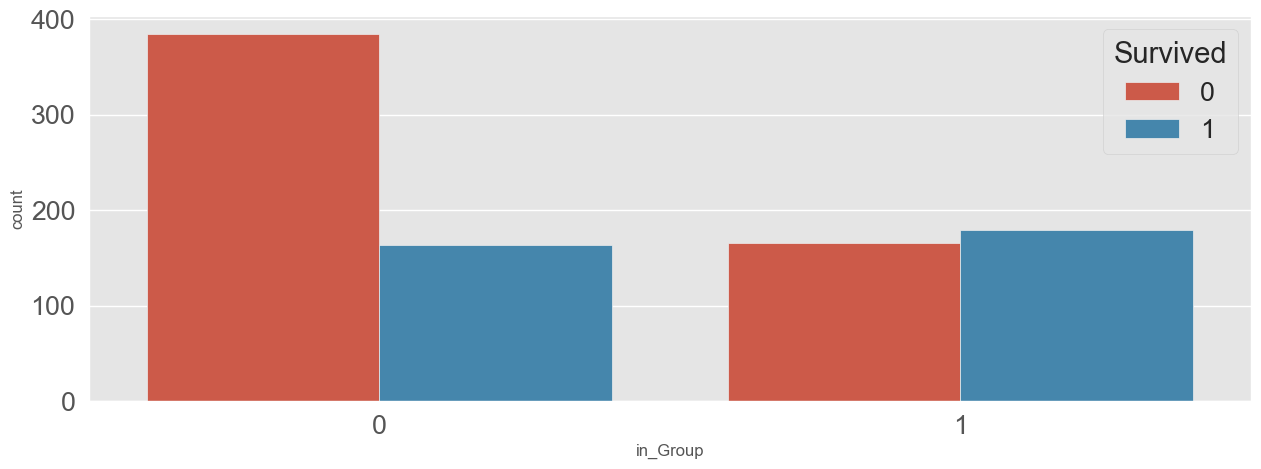

In [30]:
sns.countplot(x=train_df['in_Group'].sort_values(ascending=False), hue=train_df['Survived'])

<i><p style="font-size:16px; border: 2px solid black; margin: 20px; padding: 20px;">It seems people that were in groups had better chance of survival

### SibSp & ParCh

<Axes: xlabel='SibSp', ylabel='count'>

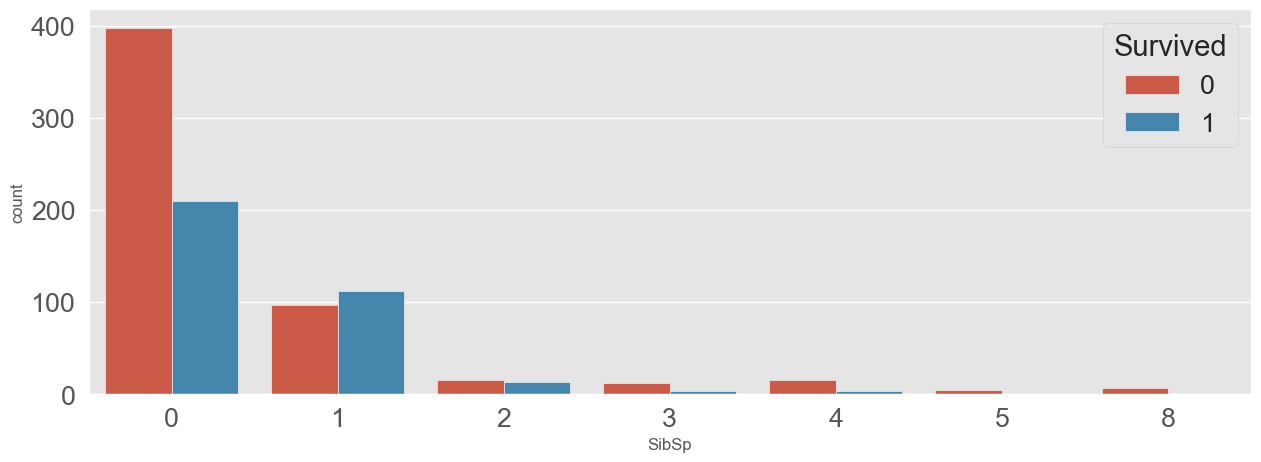

In [31]:
sns.countplot(x=train_df['SibSp'].sort_values(ascending=False), hue=train_df['Survived'])

<i><p style="font-size:16px; border: 2px solid black; margin: 20px; padding: 20px;"> From the figure we can only tell that those who weren't with their spouse or siblings had less chance of survival

<Axes: xlabel='Parch', ylabel='count'>

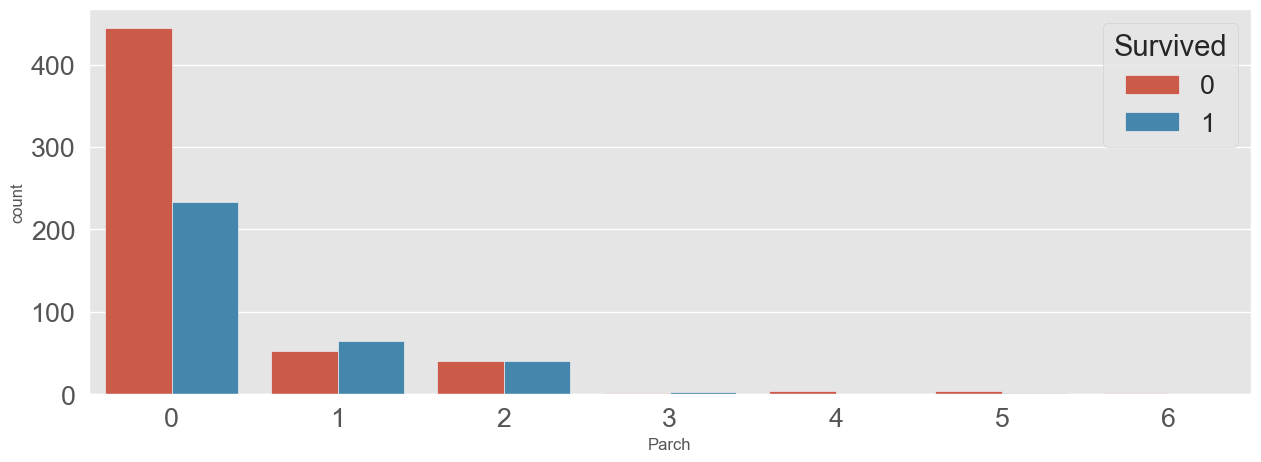

In [32]:
sns.countplot(x=train_df['Parch'].sort_values(ascending=False), hue=train_df['Survived'])

<i><p style="font-size:16px; border: 2px solid black; margin: 20px; padding: 20px;"> From the figure we can only tell that those who weren't with their parents or children had less chance of survival. We can also tell that the distribution in this figure and the previous one are very close, so let's group them

In [33]:
has_relatives = ((train_df["SibSp"] > 0) | (train_df["Parch"] > 0))*1
train_df["with_Relatives"] = has_relatives

<Axes: xlabel='with_Relatives', ylabel='count'>

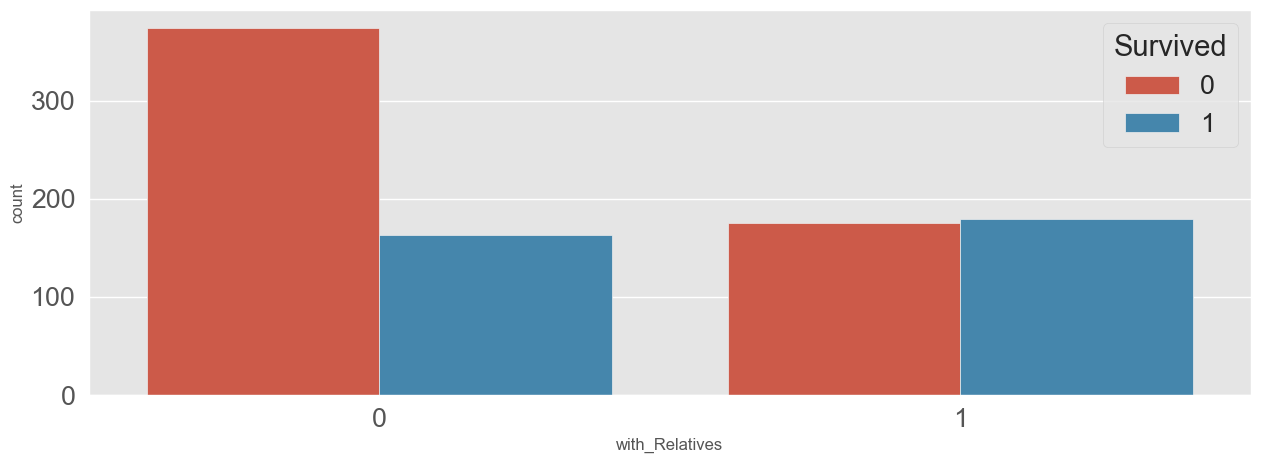

In [34]:
sns.countplot(x=train_df['with_Relatives'].sort_values(ascending=False), hue=train_df['Survived'])

<i><p style="font-size:16px; border: 2px solid black; margin: 20px; padding: 20px;"> This looks very similar to the *in_Group* count plot, we can group them even further

In [35]:
train_df["is_Alone"] = (~((has_relatives | is_group).astype(bool)))*1

<Axes: xlabel='is_Alone', ylabel='count'>

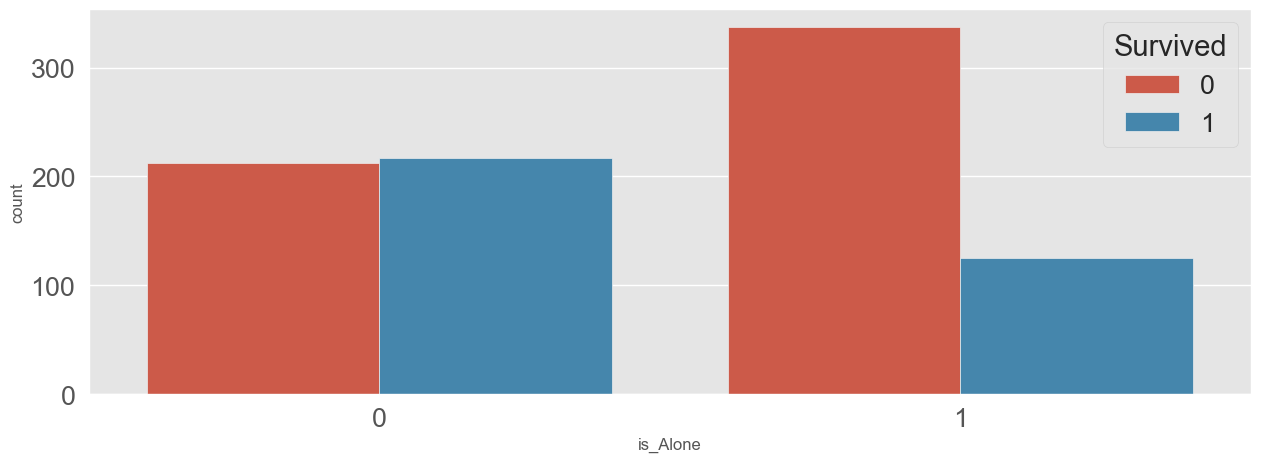

In [36]:
sns.countplot(x=train_df['is_Alone'].sort_values(ascending=False), hue=train_df['Survived'])


<i><p style="font-size:16px; border: 2px solid black; margin: 20px; padding: 20px;"> Now we can say that the passengers that were alone had higher chance of not making it

### Imputing values

Let's have a look at the data frame again

In [37]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    int64  
 1   Pclass          891 non-null    int64  
 2   Sex             891 non-null    object 
 3   Age             714 non-null    float64
 4   SibSp           891 non-null    int64  
 5   Parch           891 non-null    int64  
 6   Ticket          891 non-null    object 
 7   Fare            891 non-null    float64
 8   Cabin           204 non-null    object 
 9   Embarked        889 non-null    object 
 10  Fare_range      891 non-null    object 
 11  Age_ranges      891 non-null    object 
 12  has_cabin       891 non-null    int64  
 13  in_Group        891 non-null    int32  
 14  with_Relatives  891 non-null    int32  
 15  is_Alone        891 non-null    int32  
dtypes: float64(2), int32(3), int64(5), object(6)
memory usage: 101.1+ KB


- is_Alone column represents Parch, SibSp, Ticket, in_Group, and with_Relatives columns, so we can safely drop them
- has_cabin represents Cabin so we can drop it
- Age still has missing values that we need to deal with
- Emarked still has missing values that we need to deal with

first, drop the unnecessary columns

In [38]:
train_df.drop(['in_Group', 'with_Relatives', 'Parch', 'SibSp', 'Ticket', 'Fare_range', 'Age_ranges', 'Cabin'], axis=1, inplace=True)


In [39]:
# Replace misising values in Age column with mean
age_mean = train_df['Age'].mean()
train_df["Age"] = train_df["Age"].fillna(int(age_mean))

In [40]:
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)

In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    object 
 3   Age        891 non-null    float64
 4   Fare       891 non-null    float64
 5   Embarked   891 non-null    object 
 6   has_cabin  891 non-null    int64  
 7   is_Alone   891 non-null    int32  
dtypes: float64(2), int32(1), int64(3), object(2)
memory usage: 52.3+ KB


This is enough analysis for now, let's encode the "Sex" and "Embarked" columns and save the new dataframe. We will also need to apply the same transformation for the test set.

In [42]:
train_df["Sex"] = train_df["Sex"].map({"male": 0, "female": 1})
train_df['Embarked'] = train_df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

In [48]:
test_data_original = pd.read_csv("titanic_test.csv")

test_data = test_data_original.drop(["Name", "PassengerId"], axis=1)

# replace misising values in Age column with mean
age_mean = test_data['Age'].mean()
test_data["Age"] = test_data["Age"].fillna(int(age_mean))

fare_mean = test_data['Fare'].mean()
test_data["Fare"] = test_data["Fare"].fillna(int(fare_mean))

test_data['Embarked'] = test_data["Embarked"].map({"S": 0, "C": 1, "Q": 2})
test_data["Sex"] = test_data["Sex"].map({"male": 0, "female": 1})

test_data['has_cabin'] = test_data['Cabin'].apply(lambda x: 0 if x is np.nan else 1)

# change ticket to check if in group
ticket_groups = test_data["Ticket"].value_counts()
groups_list = list(ticket_groups[ticket_groups != 1].index)
is_group = test_data.Ticket.isin(groups_list)*1

# change sibsp and parch to has relatives
has_relatives = ((test_data["SibSp"] > 0) | (test_data["Parch"] > 0))*1

test_data["is_Alone"] = (~((has_relatives | is_group).astype(bool)))*1

test_data = test_data.drop(["SibSp", "Parch", "Ticket", "Cabin"], axis=1)

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     418 non-null    int64  
 1   Sex        418 non-null    int64  
 2   Age        418 non-null    float64
 3   Fare       418 non-null    float64
 4   Embarked   418 non-null    int64  
 5   has_cabin  418 non-null    int64  
 6   is_Alone   418 non-null    int32  
dtypes: float64(2), int32(1), int64(4)
memory usage: 21.4 KB


In [ ]:
train_df.to_csv("preprocessed_train.csv")
test_data.to_csv("preprocessed_test.csv")

In [43]:
columns = train_df.columns[1:]
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(train_df.drop(columns=["Survived"]))

new_df = pd.DataFrame(X_train, columns=columns)

## Extra: Visualizing the datapoints

In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
df_pca = pca.fit_transform(new_df)


In [45]:
pca_df = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2', 'PC3'])

pca_df['Survived'] = train_df['Survived']

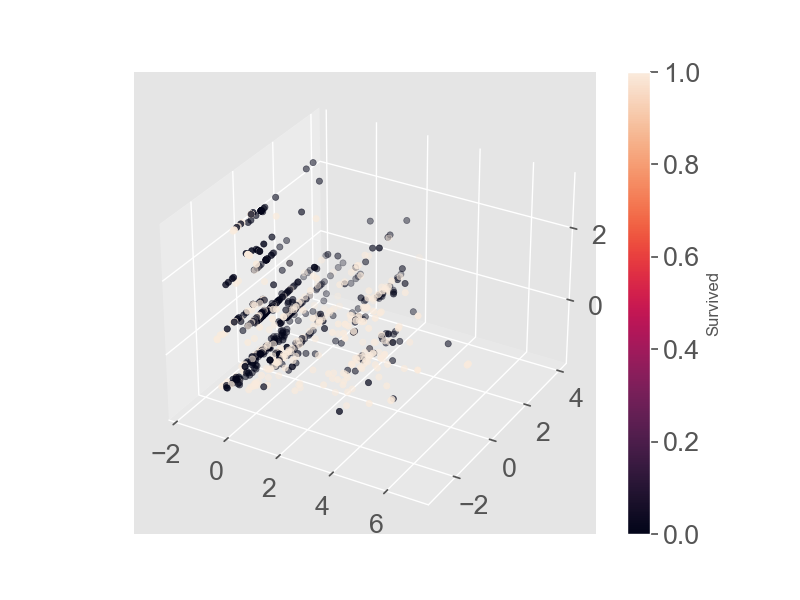

In [47]:
%matplotlib ipympl
# Plot
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Survived', palette='Set1')

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(xs=pca_df['PC1'], ys=pca_df['PC2'], zs=pca_df['PC3'], c=pca_df['Survived'])

# Add color bar
plt.colorbar(scatter, label='Survived')
